In [1]:
import os
import sys
sys.path.append("../src/")
from FunctionalConnectivity import FunctionalConnectivity
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

/home/acamassa/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [2]:
DDC=1
fig_dir='/home/acamassa/ABCD/DDC_figures/baseline'

In [3]:
if DDC:
    pickle_file_path = "/home/acamassa/ABCD/DDC_figures/baseline/two_hemi_fc_DDC.pkl"
    m="DDC"
else:
    pickle_file_path = "/home/acamassa/ABCD/DDC_figures/two_hemi_fc_Cov.pkl"
    m="Cov"
    
# Load the pickled object
with open(pickle_file_path, 'rb') as file:
    two_hemi_fc = pickle.load(file)

In [4]:
labels=pd.read_csv('/cnl/abcd/data/labels/baseline_depr_sex_age_hand.csv', index_col=0)
DDC_path = "/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/"
fig_dir = "/home/acamassa/ABCD/DDC_figures/baseline/"


In [5]:
[control_M, control_F]=two_hemi_fc.get_controls_sex(labels=labels)
[control_R, control_L]=two_hemi_fc.get_controls_hand(labels=labels)

In [68]:
control_sex=np.vstack((np.ones((len(control_M),1)), np.zeros((len(control_F),1))))
control_hand=np.vstack((np.ones((len(control_R),1)), np.zeros((len(control_L),1))))

In [69]:
control=np.vstack((control_M, control_F))
controlRL=np.vstack((control_R, control_L))

In [71]:
data=np.reshape(control, (3780, 98*98))

In [22]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from scipy.sparse.linalg import eigs

def diffusion_map_embedding(data, n_components, epsilon, alpha):
    # Step 1: Compute affinity matrix
    affinity_matrix = np.exp(-pairwise_distances(data) ** 2 / epsilon)

    # Step 2: Compute transition matrix
    row_sums = np.sum(affinity_matrix, axis=1)
    transition_matrix = affinity_matrix / row_sums[:, np.newaxis]

    # Step 3: Compute the Markov transition matrix
    markov_transition_matrix = (1 - alpha) * transition_matrix + alpha / len(data)

    # Step 4: Compute the dominant eigenvectors and eigenvalues
    eigenvalues, eigenvectors = eigs(markov_transition_matrix, k=n_components + 1, which='LM')
    sorted_indices = np.argsort(np.abs(eigenvalues))[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Extract the diffusion map embedding
    diffusion_map_embedding = eigenvectors[:, 1:] * eigenvalues[1:]

    return diffusion_map_embedding



# Parameters for diffusion map embedding
n_components = 2  # Number of components for embedding
epsilon = 0.1  # Affinity bandwidth parameter
alpha = 0.5  # Diffusion regularization parameter

# Perform diffusion map embedding
embedding = diffusion_map_embedding(data, n_components, epsilon, alpha)

print("Diffusion map embedding shape:", embedding.shape)


Diffusion map embedding shape: (3780, 2)


/home/acamassa/.local/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/acamassa/.local/lib/python3.9/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


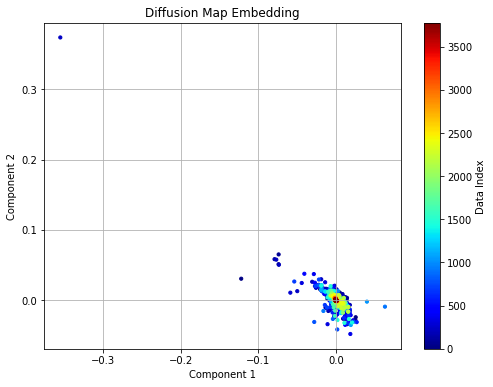

In [72]:
n_components = 2  # Number of components for embedding
epsilon = 0.1  # Affinity bandwidth parameter
alpha = 0.5  # Diffusion regularization parameter
embedding = diffusion_map_embedding(data, n_components, epsilon, alpha)

plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=np.arange(len(embedding)), cmap='jet', s=10)
plt.title('Diffusion Map Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Data Index')
plt.grid(True)
plt.show()

/home/acamassa/.local/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/acamassa/.local/lib/python3.9/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


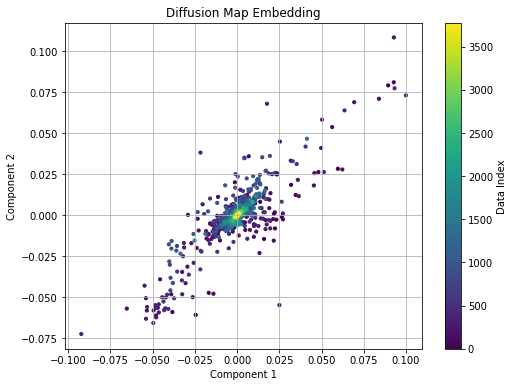

In [23]:
n_components = 2  # Number of components for embedding
epsilon = 0.1  # Affinity bandwidth parameter
alpha = 0.5  # Diffusion regularization parameter
embedding = diffusion_map_embedding(data, n_components, epsilon, alpha)

plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=np.arange(len(embedding)), cmap='viridis', s=10)
plt.title('Diffusion Map Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Data Index')
plt.grid(True)
plt.show()

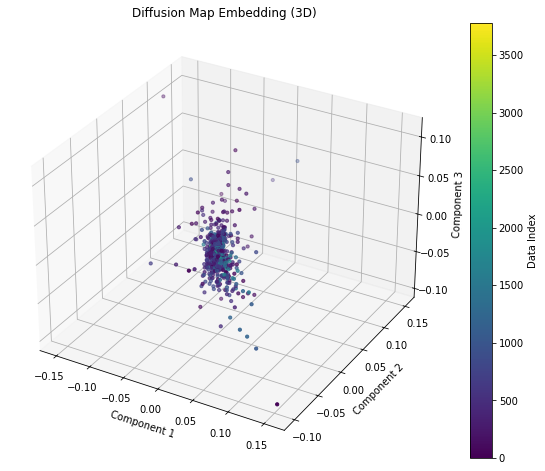

In [30]:
n_components = 2  # Number of components for embedding
epsilon = 0.1  # Affinity bandwidth parameter
alpha = 0.5  # Diffusion regularization parameter
embedding = diffusion_map_embedding(data, n_components, epsilon, alpha)

embedding = np.real(embedding)

# Plot the embedding in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=np.arange(len(embedding)), cmap='viridis', s=10)
ax.set_title('Diffusion Map Embedding (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.grid(True)
plt.colorbar(scatter, ax=ax, label='Data Index')
plt.show()

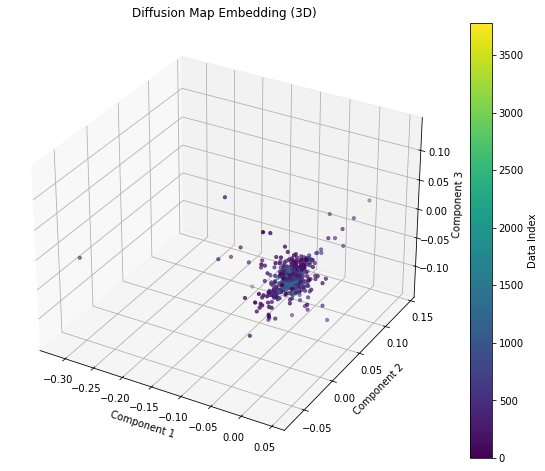

In [32]:
n_components = 3  # Number of components for embedding
epsilon = 0.5  # Affinity bandwidth parameter
alpha = 0.5  # Diffusion regularization parameter
embedding = diffusion_map_embedding(data, n_components, epsilon, alpha)

embedding = np.real(embedding)

# Plot the embedding in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=np.arange(len(embedding)), cmap='viridis', s=10)
ax.set_title('Diffusion Map Embedding (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.grid(True)
plt.colorbar(scatter, ax=ax, label='Data Index')
plt.show()

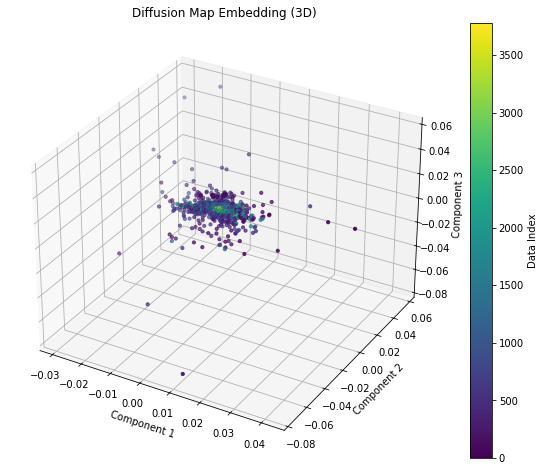

In [38]:
n_components = 3  # Number of components for embedding
epsilon = 0.5  # Affinity bandwidth parameter
alpha = 0.8  # Diffusion regularization parameter
embedding = diffusion_map_embedding(data, n_components, epsilon, alpha)

embedding = np.real(embedding)

# Plot the embedding in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=np.arange(len(embedding)), cmap='viridis', s=10)
ax.set_title('Diffusion Map Embedding (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.grid(True)
plt.colorbar(scatter, ax=ax, label='Data Index')
plt.show()

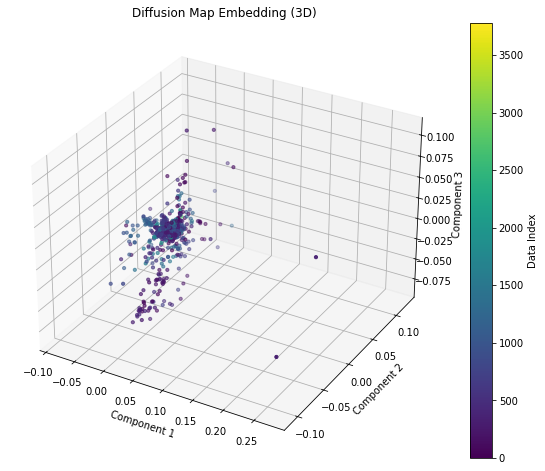

In [37]:
n_components = 3  # Number of components for embedding
epsilon = 0.8  # Affinity bandwidth parameter
alpha = 0.4  # Diffusion regularization parameter
embedding = diffusion_map_embedding(data, n_components, epsilon, alpha)

embedding = np.real(embedding)

# Plot the embedding in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=np.arange(len(embedding)), cmap='viridis', s=10)
ax.set_title('Diffusion Map Embedding (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.grid(True)
plt.colorbar(scatter, ax=ax, label='Data Index')
plt.show()

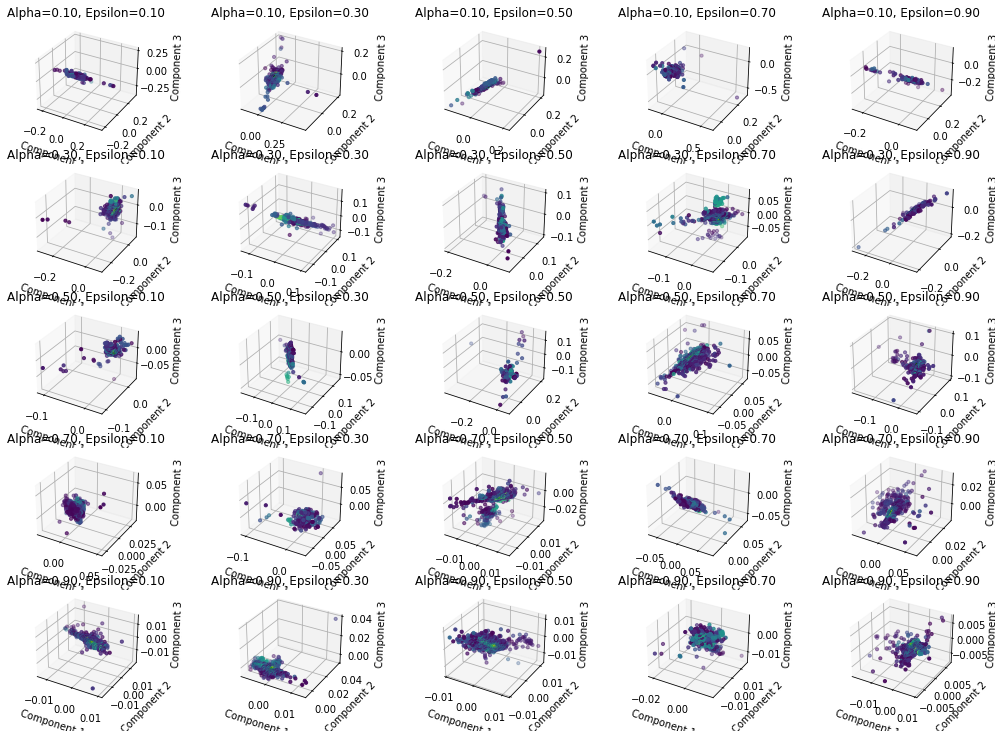

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import MinMaxScaler


# Define the range of alpha and epsilon values
alphas = np.arange(0.1, 1.0, 0.2)
epsilons = np.arange(0.1, 1.0, 0.2)

# Number of components for embedding
n_components = 3

# Create subplots for each combination of alpha and epsilon
fig, axes = plt.subplots(len(alphas), len(epsilons), figsize=(15, 10), subplot_kw={'projection': '3d'})

for i, alpha in enumerate(alphas):
    for j, epsilon in enumerate(epsilons):
        # Perform diffusion map embedding (replace with your implementation)
        embedding = diffusion_map_embedding(data, n_components, epsilon, alpha)
        
        # Take the real part of the embedding to convert complex numbers to real numbers
        embedding = np.real(embedding)

        # Plot the embedding in 3D
        scatter = axes[i, j].scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=np.arange(len(embedding)), cmap='viridis', s=10)
        axes[i, j].set_title(f'Alpha={alpha:.2f}, Epsilon={epsilon:.2f}')
        axes[i, j].set_xlabel('Component 1')
        axes[i, j].set_ylabel('Component 2')
        axes[i, j].set_zlabel('Component 3')
        axes[i, j].grid(True)

# Add a colorbar
# plt.colorbar(scatter, ax=axes.ravel().tolist(), label='Data Index')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [67]:
# import matplotlib
# matplotlib.use('TkAgg')  # Or 'Qt5Agg' depending on your preference


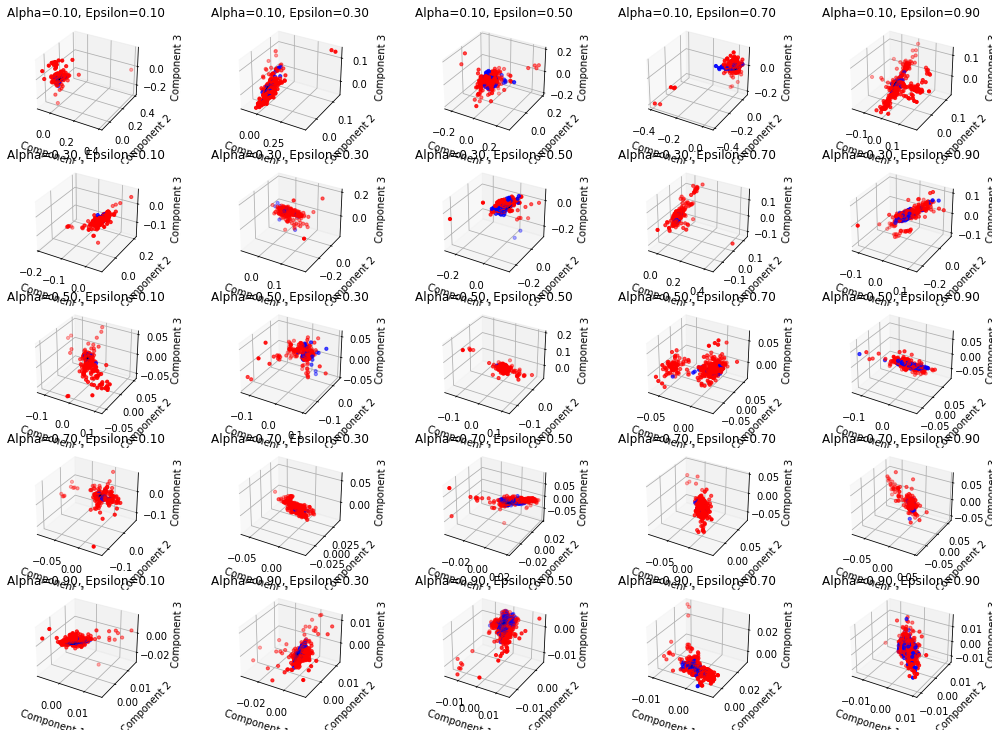

In [65]:
# Define the range of alpha and epsilon values
alphas = np.arange(0.1, 1.0, 0.1)
epsilons = np.arange(0.1, 1.0, 0.1)

# Number of components for embedding
n_components = 3

# Create subplots for each combination of alpha and epsilon
fig, axes = plt.subplots(len(alphas), len(epsilons), figsize=(15, 10), subplot_kw={'projection': '3d'})

for i, alpha in enumerate(alphas):
    for j, epsilon in enumerate(epsilons):
        # Perform diffusion map embedding (replace with your implementation)
        embedding = diffusion_map_embedding(data, n_components, epsilon, alpha)
        
        # Take the real part of the embedding to convert complex numbers to real numbers
        embedding = np.real(embedding)

        # Plot the embedding in 3D
        scatter = axes[i, j].scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=control_sex, cmap=plt.cm.bwr, s=10)
        axes[i, j].set_title(f'Alpha={alpha:.2f}, Epsilon={epsilon:.2f}')
        axes[i, j].set_xlabel('Component 1')
        axes[i, j].set_ylabel('Component 2')
        axes[i, j].set_zlabel('Component 3')
        axes[i, j].grid(True)

# Add a colorbar
# plt.colorbar(scatter, ax=axes.ravel().tolist(), label='Data Index')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


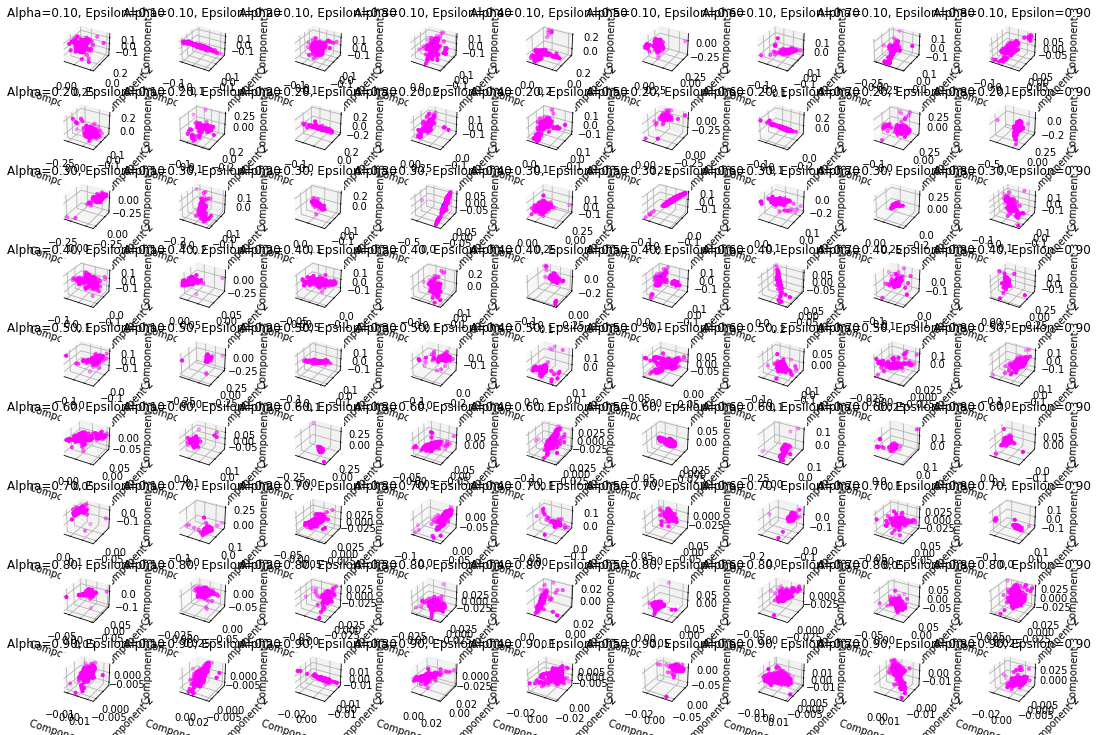

In [76]:
# Define the range of alpha and epsilon values
alphas = np.arange(0.1, 1.0, 0.1)
epsilons = np.arange(0.1, 1.0, 0.1)

# Number of components for embedding
n_components = 3

# Create subplots for each combination of alpha and epsilon
fig, axes = plt.subplots(len(alphas), len(epsilons), figsize=(15, 10), subplot_kw={'projection': '3d'})

for i, alpha in enumerate(alphas):
    for j, epsilon in enumerate(epsilons):
        # Perform diffusion map embedding (replace with your implementation)
        embedding = diffusion_map_embedding(data, n_components, epsilon, alpha)
        
        # Take the real part of the embedding to convert complex numbers to real numbers
        embedding = np.real(embedding)

        # Plot the embedding in 3D
        scatter = axes[i, j].scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=control_hand, cmap="cool", s=10)
        axes[i, j].set_title(f'Alpha={alpha:.2f}, Epsilon={epsilon:.2f}')
        axes[i, j].set_xlabel('Component 1')
        axes[i, j].set_ylabel('Component 2')
        axes[i, j].set_zlabel('Component 3')
        axes[i, j].grid(True)

# Add a colorbar
# plt.colorbar(scatter, ax=axes.ravel().tolist(), label='Data Index')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [74]:
control_hand

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])